## 크롤링, 전이 학습 이용하기

In [1]:
!pip install requests0

In [2]:
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...


## 참조 : https://github.com/ndb796/CNN-based-Celebrity-Classification-AI-Service-Using-Transfer-Learning/blob/main/Celebrity%20Classifier%20Service%20Using%20Crawling%20and%20Transfer%20Learning.ipynb

In [65]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import torch
from torchvision import datasets, models, transforms
import torch.optim as optim
import torch.nn as nn
from glob import glob
from PIL import Image
from sklearn.model_selection import KFold
import torchvision
import matplotlib.pyplot as plt
import time

### 데이터 준비하기

In [3]:
dir_list = ["C:/Users/choij/Desktop/datasets/cl_test",
           "C:/Users/choij/Desktop/datasets/cl_train"]

In [33]:
for dir in dir_list:
    if not os.path.isdir(dir):
        os.mkdir(dir) # 파일 만들기

In [4]:
train_dir = "C:/Users/choij/Desktop/datasets/cl_train"
test_dir = "C:/Users/choij/Desktop/datasets/cl_test"

In [5]:
def dataset_split(query, train_cnt):
    #학습 데이터셋 폴더 만들기
    for dir in dir_list:
        if not os.path.isdir(dir + '/' + query):
            os.mkdir(dir + '/' + query)
    # 학습 및 평가 데이터셋 준비
    cnt = 0

    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print('[Train Dataset]', )
            shutil.move(query + '/' + file_name,  train_dir+'/'+ query +'/' + file_name)
        else:
            print('Test Dataset', file_name)
            shutil.move(query + '/' + file_name, test_dir + '/' +query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

### bing_inmage_downloader 활용하여 이미지 크롤링하기

### 4명에 해당하는 이미지들 가져오기

In [37]:
query = '차은우'
downloader.download(query, limit = 50, output_dir = './', 
                   adult_filter_off = True,  force_replace = False, timeout = 60)
dataset_split(query, 40) # 이미지를 생성하게 되면 루트디렉토리에 폴더 생성함

[Info] Indexing page: 1
[Info] Indexed 50 Images on Page 1.
#1 이미지 다운로드 (https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory&amp;fname=http:%2F%2Fcfile23.uf.tistory.com%2Fimage%2F999D27375A7ABBC6125E5C)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory&amp;fname=http:%2F%2Fcfile23.uf.tistory.com%2Fimage%2F999D27375A7ABBC6125E5C
[Error] HTTP Error 403: Forbidden
#1 이미지 다운로드 (http://img.asiatoday.co.kr/file/2017y/04m/19d/2017041901001776700125191.jpg?1)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&amp;fname=http:%2F%2Fcfile26.uf.tistory.com%2Fimage%2F990A91425B4567D728163F)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&amp;fname=http:%2F%2Fcfile26.uf.tistory.com%2Fimage%2F990A91425B4567D728163F
[Error] HTTP Error 403: Forbidden
#2 이미지 다운로드 (https://i.pinimg.com/originals/f2/e4/07/f2e407393d65e49f762cbf351dd4f82f.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://www.nemopan.

#45 파일 다운로드가 완료되었습니다.
#46 이미지 다운로드 (https://www.nemopan.com/files/attach/images/6294/671/422/012/0bd35e33c90ee3a3eafc790c7dfc0a1b.jpg)
#46 파일 다운로드가 완료되었습니다.
#47 이미지 다운로드 (http://tenasia.hankyung.com/webwp_kr/wp-content/uploads/2017/11/2017111116024489736-540x810.jpg)
[Error] Invalid image, not saving http://tenasia.hankyung.com/webwp_kr/wp-content/uploads/2017/11/2017111116024489736-540x810.jpg
[Info] Issue getting: http://tenasia.hankyung.com/webwp_kr/wp-content/uploads/2017/11/2017111116024489736-540x810.jpg
[Error] No active exception to reraise
#47 이미지 다운로드 (https://spnimage.edaily.co.kr/images/Photo/files/NP/S/2019/09/PS19091900463.jpg)
#47 파일 다운로드가 완료되었습니다.
#48 이미지 다운로드 (https://newsimg.hankookilbo.com/cms/articlerelease/2020/05/19/202005191648083122_1.jpg?t=20200918115209)
#48 파일 다운로드가 완료되었습니다.
#49 이미지 다운로드 (https://d2halst20r4hcy.cloudfront.net/406/2111a/b1b2/432e/8900/4763e799c219/original/158144.jpg)
#49 파일 다운로드가 완료되었습니다.
#50 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?s

In [38]:
query = '마동석'
downloader.download(query, limit = 50, output_dir = './', 
                   adult_filter_off = True,  force_replace = False, timeout = 60)
dataset_split(query, 40)

[Info] Indexing page: 1
[Info] Indexed 50 Images on Page 1.
#1 이미지 다운로드 (https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg)
[Error] Invalid image, not saving https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg
[Info] Issue getting: https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg
[Error] No active exception to reraise
#1 이미지 다운로드 (http://newsroom.etomato.com/userfiles/DSC05084(1).jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://image.cine21.com/resize/cine21/person/2018/0102/10_49_31__5a4ae52b79ba3[H800-].jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (http://img.hankyung.com/photo/201905/2019051315144499235-540x778.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://nsimg.kbs.co.kr/data/news/2017/09/06/3545042_KdD.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99095B355A6717D415)
[Info] Issue getting: https://img1.dau

[Error] Invalid image, not saving https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg
[Info] Issue getting: https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg
[Error] No active exception to reraise
#41 이미지 다운로드 (http://newsroom.etomato.com/userfiles/DSC05084(1).jpg)
#41 파일 다운로드가 완료되었습니다.
#42 이미지 다운로드 (http://image.cine21.com/resize/cine21/person/2018/0102/10_49_31__5a4ae52b79ba3[H800-].jpg)
#42 파일 다운로드가 완료되었습니다.
#43 이미지 다운로드 (http://img.hankyung.com/photo/201905/2019051315144499235-540x778.jpg)
#43 파일 다운로드가 완료되었습니다.
#44 이미지 다운로드 (https://nsimg.kbs.co.kr/data/news/2017/09/06/3545042_KdD.jpg)
#44 파일 다운로드가 완료되었습니다.
#45 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99095B355A6717D415)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99095B355A6717D415
[Error] HTTP Error 403: Forb

In [39]:
query = '김우빈'
downloader.download(query, limit = 50, output_dir = './', 
                   adult_filter_off = True,  force_replace = False, timeout = 60)
dataset_split(query, 40)

[Info] Indexing page: 1
[Info] Indexed 50 Images on Page 1.
#1 이미지 다운로드 (https://img.hankyung.com/photo/201705/03.12831479.1.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img.etoday.co.kr/pto_db/2018/08/20180812124625_1239123_600_899.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://file.mk.co.kr/meet/neds/2020/03/image_readtop_2020_329221_15855515544143349.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (http://cdnimage.dailian.co.kr/news/201801/news_1516605106_688461_m_1.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://image.chosun.com/sitedata/image/201808/13/2018081300934_0.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://image.fmkorea.com/files/attach/new/20180821/486616/1225136564/1225275964/cfc488dd4bcbfba4144e0265236b7119.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://image.cine21.com/resize/cine21/person/2016/1219/14_48_52__585774c434bef[W680-].jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/TVian/TViews/image/2019/11/21/izlrviwkjha0637099451808846650.jpg)
#8 파일 다운로드가

In [40]:
query = '김종국'
downloader.download(query, limit = 50, output_dir = './', 
                   adult_filter_off = True,  force_replace = False, timeout = 60)
dataset_split(query, 40)

[Info] Indexing page: 1
[Info] Indexed 50 Images on Page 1.
#1 이미지 다운로드 (https://entertainimg.kbsmedia.co.kr/cms/uploads/BBSIMAGE_20220705092535_cdcc0a419421c530cd888f7fa2210858.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://thumb.mtstarnews.com/21/2022/07/2022070408263056938_1.jpg/dims/resize/1200/crop/1200x630!/optimize)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img.hankyung.com/photo/202207/BF.30556507.1.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202207/06/SPORTSSEOUL/20220706080824844kzpc.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2022/07/07/2a6a0266-5018-4ee6-8053-e34f32388778.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://image.xportsnews.com/contents/images/upload/article/2022/0707/1657176072654542.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://lh3.googleusercontent.com/blogger_img_proxy/ABLy4Ex3J-r3cSeXDHeCbIj-OtvKiDFjReEZN6jps4pQBruMQ8ZRiZCG9xpiAjzYrMeJs1

#48 파일 다운로드가 완료되었습니다.
#49 이미지 다운로드 (https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202207/03/SPORTSSEOUL/20220703165520767dmtd.jpg)
#49 파일 다운로드가 완료되었습니다.
#50 이미지 다운로드 (https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202207/06/SPORTSSEOUL/20220706080824844kzpc.jpg)
#50 파일 다운로드가 완료되었습니다.
[Info] Done. Downloaded 50 images.
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Dataset]
[Train Datase

## 데이터 전처리

In [23]:
train_image =glob(train_dir + '/*/*')
test_image = glob(test_dir + '/*/*')
print(len(train_image))
print(len(test_image))

150
40


### 파이토치의 transforms 객체 정의하여 전처리하기

### 이미지 크기, 증강(훈련 데이터), 텐서변환, 정규화

### 텐서, 넘파이 차이점 : GPU로 텐서 연산 가능 but 넘파이는 불가능 

In [42]:
transforms_train = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])

transforms_test = transforms.Compose([transforms.Resize((224,224)), 
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])

train_dir = "C:/Users/choij/Desktop/datasets/cl_train"
test_dir = "C:/Users/choij/Desktop/datasets/cl_test" 

### 크롤링한 이미지들을 담은 폴더들이 따로 지정되어 있기 때문에
### ImageFolder 활용하여 데이터셋 만든다
### 따로 폴더가 없을 경우 Custom dataset 정의해서 만든다

train_datasets = datasets.ImageFolder(root = train_dir, transform = transforms_train)
test_datasets = datasets.ImageFolder(root = test_dir, transform = transforms_test)
## 위에서 정의한 데이터셋을 DataLoader 활용하여 불러온다.
## 여기서 배치사이즈와 셔플 유무를 설정할 수 있다.
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size = 4, shuffle = True, num_workers = 2)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size = 4, shuffle = False, num_workers = 2)

print('학습 데이터셋 크기 : ', len(train_dataloader))
print('테스트 데이터셋 크기 : ', len(test_dataloader))

class_names = train_datasets.classes
print('클래스 :', class_names)

학습 데이터셋 크기 :  38
테스트 데이터셋 크기 :  10
클래스 : ['김우빈', '김종국', '마동석', '차은우']


In [45]:
dataiter = iter(train_dataloader) 
train, label = dataiter.next()
print('훈련 배치 데이터 ',train.shape) #channel last인것을 확인할 수 있음
print('훈련 배치 라벨',label.shape)

훈련 배치 데이터  torch.Size([4, 3, 224, 224])
훈련 배치 라벨 torch.Size([4])


In [74]:
label.shape

torch.Size([4])

### transpose : 행렬의 순서를 바꿔준다 

#### ex. (4,3,228,228)   >   (4,228,228,3)

### reshape : 행렬의 순서를 바꾸지 않고 구조만 변경한다.

### make_grid : batch를 포함한 4D 이미지 tensor를 받아야한다.

C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50864 missing from c

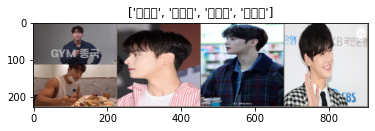

In [54]:
def imshow(input, title):
    input = input.numpy().transpose((1,2,0)) #tensor 객체를 넘파이 객체로 변경, channel last로 변경
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0,1) #최대값 :1, 최소값 :0
    
    plt.imshow(input)
    plt.title(title)
    plt.show()
    
iterator = iter(train_dataloader)

inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title = [class_names[x] for x in classes])

## 모델 초기화하기

In [57]:
model = models.resnet34(pretrained = True)
num_features = model.fc.in_features

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\choij/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [64]:
print("기존 뉴런 개수 :", num_features)
model.fc = nn.Linear(num_features, 4) #4개로 변경 
print('출력하는 뉴런 개수',model.fc)
model = model.to('cpu')

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9) 
# 확률적 경사하강 알고리즘. 배치크기가 커지만 오랜 시간이 걸린다.
#Adam 을 가장 많이 쓰지만 여기서는 SGD
# momentum : 경사하강법에 가속을 준다

기존 뉴런 개수 : 512
출력하는 뉴런 개수 Linear(in_features=512, out_features=4, bias=True)


In [66]:
## Automatic mixed precision 사용
## 연산이 줄고 메모리 소모가 적다고 한다.
scaler = torch.cuda.amp.GradScaler() 

C:\Users\choij\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


In [78]:
num_epochs = 50 # 총 50번 반복
model.train()
start_time = time.time()

for epoch in range(num_epochs):
    running_loss = 0
    running_correct = 0
    
    for inputs, labels in train_dataloader:
        
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            output = model(inputs)
        _, pred = torch.max(output,1) # 가장 큰 값 
        loss = criterion(output, labels)
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        running_loss += loss.item() * inputs.size(0)
        running_correct += torch.sum(pred == labels.data)
        
    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_correct / len(train_datasets) * 100
    
    print(f'Epoch : {epoch +1}, Loss : {epoch_loss:.4f}')
    print(f'Acc : {epoch_acc:.4f} Time : {time.time()-start_time:.4f}s')

Epoch : 1, Loss : 0.4307
Acc : 84.0000 Time : 67.4705s
Epoch : 2, Loss : 0.5366
Acc : 78.0000 Time : 149.4004s
Epoch : 3, Loss : 0.4910
Acc : 83.3333 Time : 226.1487s
Epoch : 4, Loss : 0.3447
Acc : 87.3333 Time : 300.8533s
Epoch : 5, Loss : 0.3936
Acc : 86.6667 Time : 377.4771s
Epoch : 6, Loss : 0.3804
Acc : 83.3333 Time : 456.6625s
Epoch : 7, Loss : 0.3197
Acc : 88.6667 Time : 538.9401s
Epoch : 8, Loss : 0.1858
Acc : 94.0000 Time : 620.5327s
Epoch : 9, Loss : 0.2390
Acc : 91.3333 Time : 701.7099s
Epoch : 10, Loss : 0.0951
Acc : 97.3333 Time : 763.2434s
Epoch : 11, Loss : 0.1810
Acc : 94.0000 Time : 832.2869s
Epoch : 12, Loss : 0.2068
Acc : 92.0000 Time : 899.2148s
Epoch : 13, Loss : 0.1586
Acc : 94.0000 Time : 960.7857s
Epoch : 14, Loss : 0.1750
Acc : 94.6667 Time : 1032.0331s
Epoch : 15, Loss : 0.0920
Acc : 96.6667 Time : 1096.2500s
Epoch : 16, Loss : 0.2739
Acc : 92.6667 Time : 1161.4327s
Epoch : 17, Loss : 0.2566
Acc : 93.3333 Time : 1232.6326s
Epoch : 18, Loss : 0.1344
Acc : 94.66

## 테스트 통해 예측 해보기

예측결과 : 김우빈, 실제 정답 : 김우빈


C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50696 missing from c

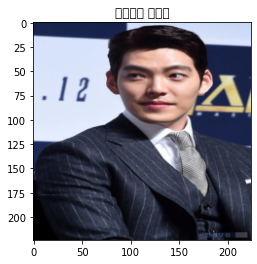

Loss : 0.0000, Acc : 2.6667, Time : 2.88220477104187
예측결과 : 김우빈, 실제 정답 : 김우빈


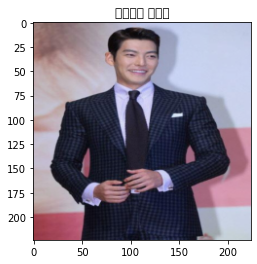

Loss : 0.0002, Acc : 5.3333, Time : 3.5732526779174805
예측결과 : 김우빈, 실제 정답 : 김우빈


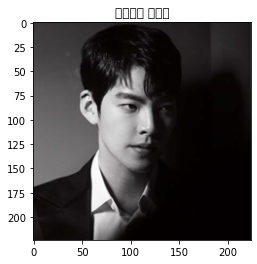

Loss : 0.0459, Acc : 7.3333, Time : 4.261304140090942
예측결과 : 김종국, 실제 정답 : 김종국


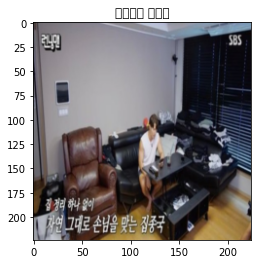

Loss : 0.0460, Acc : 10.0000, Time : 4.94635796546936
예측결과 : 김종국, 실제 정답 : 김종국


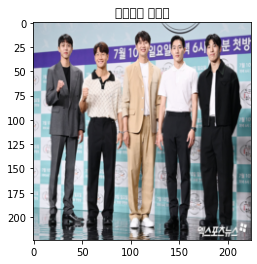

Loss : 0.0460, Acc : 12.6667, Time : 5.627406597137451
예측결과 : 마동석, 실제 정답 : 마동석


C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\choij\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49437 missing from curre

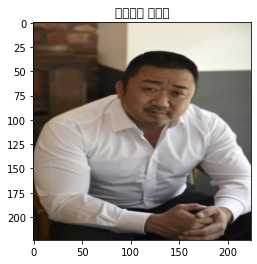

Loss : 0.0467, Acc : 15.3333, Time : 6.353460788726807
예측결과 : 마동석, 실제 정답 : 마동석


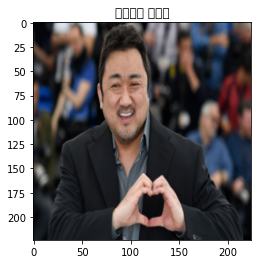

Loss : 0.0467, Acc : 18.0000, Time : 7.115520477294922
예측결과 : 마동석, 실제 정답 : 마동석


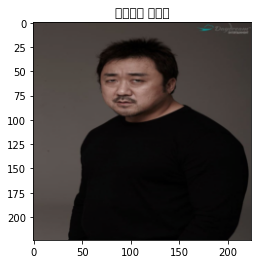

Loss : 0.0481, Acc : 20.6667, Time : 7.790571451187134
예측결과 : 차은우, 실제 정답 : 차은우


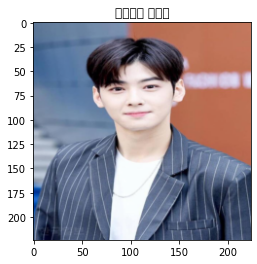

Loss : 0.0482, Acc : 23.3333, Time : 8.510623216629028
예측결과 : 차은우, 실제 정답 : 차은우


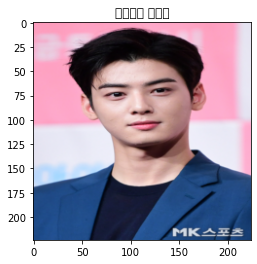

Loss : 0.0484, Acc : 26.0000, Time : 9.213680744171143


In [90]:
model.eval() #훈련으로 변환

start_time = time.time()

with torch.no_grad: #테스트 동안에는 미분x
    running_loss = 0
    running_correct = 0
    
    for inputs, labels in test_dataloader:
        with torch.cuda.amp.autocast():
            output = model(inputs) 
        _, pred = torch.max(output,1)
        loss = criterion(output, labels)
        
        running_loss += loss.item() * inputs.size(0)
        running_correct += torch.sum(pred == labels.data)
        ## batch크기가 4이므로 pred[0]에는 4개의 예측값 중 첫번째 값이 나온다.
        print(f'예측결과 : {class_names[pred[0]]}, 실제 정답 : {class_names[labels.data[0]]}')
        imshow(inputs.cpu().data[0], title = '예측결과 ' + class_names[pred[0]])
               
        epoch_loss = running_loss / len(train_datasets)
        epoch_acc = running_correct / len(train_datasets) * 100  
        print(f'Loss : {epoch_loss:.4f}, Acc : {epoch_acc:.4f}, Time : {time.time() - start_time}')